**<p align = 'center'>   😃  Arabic Dialects Classification**

# **Objective**:

#### Many countries speak Arabic. However, Each country has its own dialect, the aim of this task is to build a model that predicts the dialect given the text.

##Import Necessary Libraries

In [ ]:
!pip install contractions  pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
pip install livelossplot

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import contractions
import nltk
import pyarabic.araby as araby
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, classification_report


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dialects_database.csv')

In [ ]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',500)

In [ ]:
df.head(50)

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم.,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان. بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب\nand they live happily ever after\nذي اند,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً. ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات؟ يعني اليتيمة متستحقش تتزوج؟ وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل؟ هي متستحقش يندارلها الف حساب ولا هي عبدة؟,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت. هدي اعصابك وفكينا من التخلف امتاعك,LY
5,877881537122979840,@alibobkr63 او حتى من اي دين او طائفة. اسف ممكن الغلط غلطتي بس مكنش قصدي,LY
6,882940840888471552,@muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة,LY
7,882941769444466688,@muhamed01111 مهما اختلفنا راه نحنا خوت. والله ما عندي عدا على واحد. انا فرحان نقدر انروح لحوشنا وفرحان للناس الاخرى الفرحانة. ربي يفرجها عليك وعلينا كلنا,LY
8,882943694906818560,@muhamed01111 بالنسبة ليا انا والله شبعت هم ونكد وقتل ودم والحقد. الله يهدينا جميعا,LY
9,884736569118261248,@Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية في مية ومعندش شي اندكوا راسنا فيه الا لبس الشورتات.\nتخلف,LY


##Data Splitting

In [ ]:
x=df.drop(['id','dialect'], axis=1)
y=df['dialect']

In [ ]:
print("shape of x :",x.shape)
print("shape of y  :" ,y.shape)

shape of x : (147725, 1)
shape of y  : (147725,)


In [ ]:
x_train ,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.15, random_state=24, shuffle=True)

In [ ]:
x_train, x_val , y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

 ## 👀 EDA on training data

- check NaNs

In [ ]:
x_train.isna().sum()

text    0
dtype: int64

- check duplicates

In [ ]:
x_train.duplicated().sum()

0

- check dataset balancing

In [ ]:
y_train.value_counts()

dialect
EG    44087
LY    27916
LB    21116
SD    11048
MA     8842
Name: count, dtype: int64

####**Imbalanced Classes!!!**

## 🌟Cleaning and Preprocessing

- Remove Numbers
- Remove URLs, Mentions, and Hashtags
- Remove Non-Arabic Characters and Special Symbols
- Remove newline characters
- Remove Punctuation
- Remove Arabic Diacritics
- Remove Repeated Characters
- Remove Arabic Stopwords
- Arabic stemmer

In [ ]:
stemmer = ISRIStemmer()

In [ ]:
# Get the Arabic stop words
arabic_stopwords = set(stopwords.words('arabic'))

# Function to remove specific hamza characters and diacritics from a word
def remove_hamza_and_diacritics(word):
    word = re.sub(r'[أإآء]', '', word)
    word = re.sub(r'[\u064B-\u065F]', '', word)  # Arabic diacritics range
    return word

# Modify the stop words to remove hamza and diacritics
modified_stopwords = {remove_hamza_and_diacritics(word) for word in arabic_stopwords}

In [ ]:
def preprocess_arabic_text(text):
    # Remove Numbers
    text = re.sub('\d+',"",text)

    # Remove URLs, Mentions, and Hashtags
    text = re.sub('http\S+|www\S+|@[^\s]+|#\S+',"",text)

    # Remove Non-Arabic Characters and Special Symbols
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # Remove newline characters
    text = text.replace('\n', '')

    # Remove Punctuation
    text = re.sub(rf"[{punctuation}؟،]", " ", text)

    # Remove Arabic Diacritics
    text = araby.strip_tashkeel(text)
    text = araby.normalize_ligature(text)

    # Remove Repeated Characters
    text = re.sub(r"(\w)\1{2,}", r"\1\1", text)

    # Remove Arabic Stopwords
    text = ' '.join([word for word in text.split() if word not in modified_stopwords])

    # Initialize Arabic stemmer
    stemmer = ISRIStemmer()

    # Stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text


In [ ]:
x_train['text'] = x_train['text'].apply(preprocess_arabic_text)

In [ ]:
x_train.head(50)

,text
19555,ختر ناد نسب نجم ختر زيد برج
67797,نظر عمق ملء بحب رفق عدم تصر لحظ فرق
40032,الك غتنعس دبا اجي عبو شوة
65901,حمد شيخ فين مبيلعبش تخد قيم نسع عنه اى حجه ليه
132637,بإذ نقم جبر نهي قررب بشر
115369,طعم عذب ضب شنط
98008,يلا شفا اهه قردوغ حيجيب درف
44856,يي لزم طلب ليش دول اني اطلب صوت بعد حرض دول انه تصت ضدن عطا فلس مهم الآ طلب دعم كتر خير
44086,عمل شهر اهب صفي راه شفن بدل خمم علج اهب شوفو علج ريض رجل ماتعرفو مكن تجب لبن وهي راجعةللتذكير غرد امع سأل ربط كلم وحر نجم علم صرت قدم
66486,سقط مني ونا سجد


In [ ]:
x_val['text'] = x_val['text'].apply(preprocess_arabic_text)

In [ ]:
x_val.head(50)

,text
18757,لقت كيك حطط كتب حست ان عند عجب سرة طلع شيب معا درت رته
136591,هه علق لسه شغل طرق دي الا يخد قرض صين
143468,ليه حرق ابد ولل ماتشخص وضع ساي بين انا صدر نفذ وقل ايا كلم بعث الم فانه دير جره معا ومم اجب سير عند صين كور دي مكن تبق زيد مالازم اور وين عرف عشن صدق عبر كذب
6961,كلم منك حق رجل
132269,اخي خلي غرب بحل بخر خرج بدن قرب نهم الل يخل
68229,وده امت ونا بقل شكل ده مش غرب علا برك نور
36046,لحب حوء حول همم بكل فصل الل تحب همل هدم اي علق كانت قوة
37637,كله جبي رتح نفس عند سؤل احد عيش حيت بحر زوج اكد جبي ومو كله سلب اهم شي خار شخص لصح شخص احس انك غصب اذا سوت عشن شيء عكس تحس سعد مو تزج فقط عشن لقب تزج او تزج
146134,غنة دي حبت زول دي لجد جبت زيت كتر
58446,عشن سوو عجل بتع وين خسئ


In [ ]:
x_test['text'] = x_test['text'].apply(preprocess_arabic_text)

In [ ]:
x_test.head(50)

,text
118097,كتر بيح فسد يسم سمء رفو بهنيهمبس عم فهم ليه عطل وقف سمي نبه بري
33831,طلع عدة
31787,روق بال رتح نفس طمئ وجد عبد
147559,خلص جبر علي شنو خرج هه
122145,نيح بخش نافوخامره انا حضر شهد وكن وجد اكل قتل عصي دبغ دبغ
83694,يرب نصر هلى غلى
94698,انا شيف انن نشر كبر حرس ارخ كأس علم مش جاز حجه دعو فخر خلص يعن ده خلف يعن نكن ريح كأس علم حرس عند سنه
78596,ربي حقق امن بأذ الل
106127,ومم يكون قعد معك مش سمع كلم
44400,فعل مارتيل جمل مدن لون زرق زاد جمل


# Tokenizer and Model

In [ ]:
# Use a Set to Store Unique Words
unique_words = set()

for text in x_train['text']:
    words = text.split()  # Tokenize
    unique_words.update(words)

# Number of Unique Words
num_unique_words = len(unique_words)
print(f'Number of unique words: {num_unique_words}')

Number of unique words: 62855


**Term Frequency-Inverse Document Frequency (TF-IDF):**
-  TF-IDF assigns weights to terms based on their frequency in individual documents and their inverse frequency across all documents. This technique helps capture the importance of terms in distinguishing between documents.

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x_train['text'])
x_val_tfidf = vectorizer.transform(x_val['text'])
x_test_tfidf = vectorizer.transform(x_test['text'])

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_tfidf, y_train_encoded)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluate on validation set
y_val_pred = model.predict(x_val_tfidf)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.7700


In [ ]:
# Evaluate on test set
y_test_pred = model.predict(x_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7643


In [ ]:
precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
print(f'Precision: {precision:.4f}')

Precision: 0.7657


In [ ]:
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          EG       0.78      0.88      0.83      8592
          LB       0.80      0.77      0.78      4198
          LY       0.71      0.76      0.74      5507
          MA       0.82      0.56      0.67      1746
          SD       0.75      0.46      0.57      2116

    accuracy                           0.76     22159
   macro avg       0.77      0.69      0.72     22159
weighted avg       0.77      0.76      0.76     22159



### use 10000  Unique Words


In [ ]:
# TF-IDF Vectorization
vectorizer_ = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer_.fit_transform(x_train['text'])
x_val_tfidf = vectorizer_.transform(x_val['text'])
x_test_tfidf = vectorizer_.transform(x_test['text'])

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_tfidf, y_train_encoded)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluate on validation set
y_val_pred = model.predict(x_val_tfidf)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.7797


In [ ]:
# Evaluate on test set
y_test_pred = model.predict(x_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7735


In [ ]:
precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
print(f'Precision: {precision:.4f}')

Precision: 0.7756


In [ ]:
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          EG       0.78      0.89      0.83      8592
          LB       0.81      0.78      0.79      4198
          LY       0.72      0.78      0.75      5507
          MA       0.84      0.56      0.67      1746
          SD       0.77      0.46      0.58      2116

    accuracy                           0.77     22159
   macro avg       0.78      0.69      0.73     22159
weighted avg       0.78      0.77      0.77     22159



#### TF-IDF Vectorization with `max_features=5000`

```
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| EG    | 0.78      | 0.88   | 0.83     |
| LB    | 0.80      | 0.77   | 0.78     |
| LY    | 0.71      | 0.76   | 0.74     |
| MA    | 0.82      | 0.56   | 0.67     |
| SD    | 0.75      | 0.46   | 0.57     |

```

#### TF-IDF Vectorization with `max_features=10000`

```
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| EG    | 0.78      | 0.89   | 0.83     |
| LB    | 0.81      | 0.78   | 0.79     |
| LY    | 0.72      | 0.78   | 0.75     |
| MA    | 0.84      | 0.56   | 0.67     |
| SD    | 0.77      | 0.46   | 0.58     |


```
### Interpretation:

- When using TF-IDF vectorization with `max_features=10000`, the model achieved a slightly higher accuracy (0.77) compared to `max_features=5000` (0.76).
- The precision, recall, and F1-score for each class also show minor improvements with the increased number of features.
- However, the difference in performance between the two settings is relatively small.


## Gated Recurrent Unit (GRU)

The GRU cell replaces the Simple rnn cell, and adds a **gate** to the network, this gates allows the network to choose what to keep from the previous state, and thus can keep track of some memories, and also solves the vanishing gradient problem.

The gates allows to forget certain points of the hidden states.

The simplified version of the equations are as follows

<center><img src='images/gru.png'></center>

Here we say that $C^t = a^t = h^t$ meaning that that output state/hidden state are the same

The parameter $\tilde{C}$ is the candidate to replace vector, which will include the candidate hidden state

$$\tilde{C} = tanh(W_c [C^{t-1}, X^t] + b_c)$$

The gate $\Gamma_u$ is the gate that will tell which to forget of the last state and which to remember.

$$\Gamma_u = \sigma(W_u [C^{t-1}, X^t] + b_u)$$

The parameter $C^t$ includes the final output of the cell

$$C^t = \Gamma_u*\tilde{C} + (1-\Gamma_u)* C^{t-1}$$

So:

- if $\Gamma_u=0$ then $C^t = C^{t-1}$
- if $\Gamma_u=1$ then $C^t = \tilde{C}$

## ♻ Text Vectorization
  * **Token Indexing**: Convert tokens to numerical indices.
  * **Padding**: Ensure all sequences have the same length by padding shorter sequences.

In [ ]:
# Parameters
max_seq_length = 100
embedding_dim = 100

In [ ]:
# Tokenization and Padding
# Tokenizer to convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train["text"])

#  word index
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(f"Total words in the dataset: {total_words}")



Total words in the dataset: 62856


In [ ]:
# Get word frequencies
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Determine a suitable max_vocab_size based on a desired percentile or cutoff
cutoff_percentile = 95  # Keep top 95% of the words
cutoff_index = int(total_words * (cutoff_percentile / 100))
max_vocab_size = len([word for word, count in sorted_word_counts[:cutoff_index]])

# Refit tokenizer with limited vocab size
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train["text"])


In [ ]:
# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(x_train['text'])
X_val_seq = tokenizer.texts_to_sequences(x_val['text'])
X_test_seq = tokenizer.texts_to_sequences(x_test['text'])

In [ ]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post')

In [ ]:
 #Check the shape of the padded sequences to confirm they match with the labels
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"X_val_pad shape: {X_val_pad.shape}")
print(f"X_test_pad shape: {X_test_pad.shape}")

X_train_pad shape: (113009, 100)
X_val_pad shape: (12557, 100)
X_test_pad shape: (22159, 100)


In [ ]:
np.unique (y_train)

array(['EG', 'LB', 'LY', 'MA', 'SD'], dtype=object)

In [ ]:

# Get the number of unique classes
num_classes = len(np.unique(y_train))

# Convert labels to categorical one-hot encoding
y_train_cat = to_categorical (y_train_encoded, num_classes)
y_val_cat = to_categorical(y_val_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

In [ ]:
print (y_train_cat.shape)

(113009, 5)


### Implementing GRU in Tensorflow

In [ ]:
gru_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim= max_vocab_size, output_dim=embedding_dim ,input_length=max_seq_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
gru_bi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          5971300   
                                                                 
 bidirectional_6 (Bidirecti  (None, 100, 256)          176640    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 100, 256)          0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 100, 128)          123648    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 100, 128)          0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 128)              

In [ ]:
gru_bi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision'])


Handling Imbalnced Classes

In [ ]:
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y= y_train_encoded
)

# Convert the class weights to a dictionary format required by Keras
class_weights = {i: weight for i, weight in enumerate(class_weights)}
class_weights

{0: 0.5126635969787012,
 1: 1.070363705247206,
 2: 0.8096360510101733,
 3: 2.5561863831712284,
 4: 2.0457820419985517}

**Model Training 🏃**

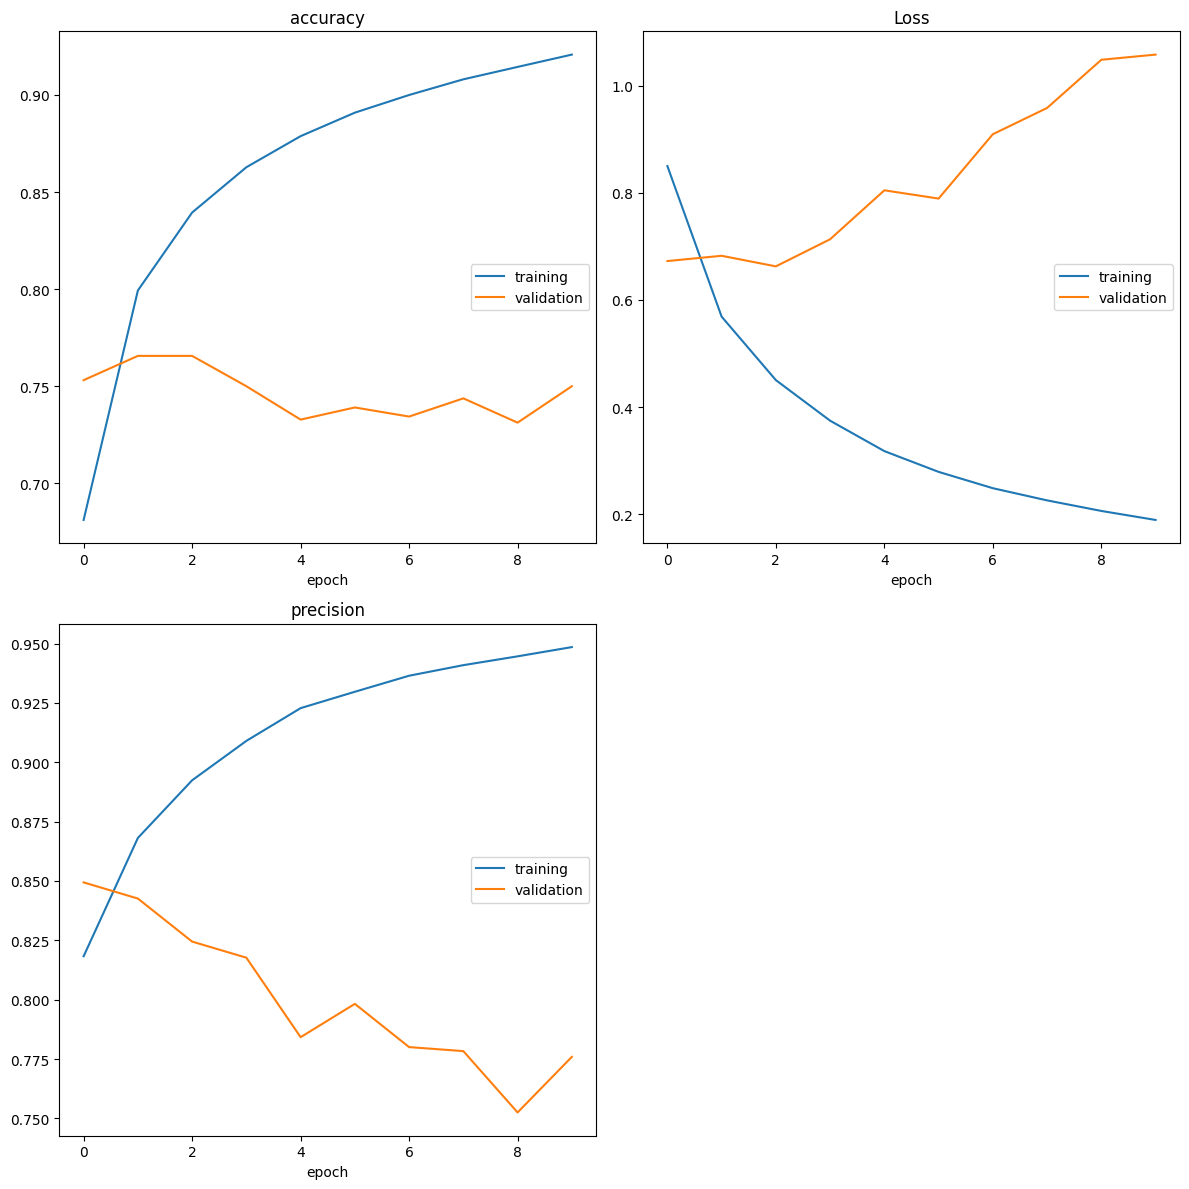

accuracy
	training         	 (min:    0.681, max:    0.921, cur:    0.921)
	validation       	 (min:    0.731, max:    0.766, cur:    0.750)
Loss
	training         	 (min:    0.189, max:    0.850, cur:    0.189)
	validation       	 (min:    0.663, max:    1.058, cur:    1.058)
precision
	training         	 (min:    0.818, max:    0.948, cur:    0.948)
	validation       	 (min:    0.753, max:    0.849, cur:    0.776)

Epoch 10: val_loss did not improve from 0.66281
1766/1766 [==============================] - 52s 30ms/step - loss: 0.1892 - accuracy: 0.9208 - precision: 0.9485 - val_loss: 1.0583 - val_accuracy: 0.7500 - val_precision: 0.7759
CPU times: user 10min 28s, sys: 29.5 s, total: 10min 57s
Wall time: 10min 30s


In [ ]:
%%time
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history_GRU = gru_bi.fit(X_train_pad, y_train_cat, epochs= 10, batch_size= 64,
                    validation_data=(X_val_pad, y_val_cat),
                    validation_steps=10,
                    class_weight=class_weights,
                    callbacks=callbacks)

🔭 **Model Evaluation**

In [ ]:
# Evaluate the Model
test_loss, test_accuracy, test_precision  = gru_bi.evaluate(X_test_pad, y_test_cat)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predict on the test set
y_test_pred = gru_bi.predict(X_test_pad)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)


693/693 [==============================] - 9s 13ms/step - loss: 1.1893 - accuracy: 0.7120 - precision: 0.7410
Test Loss: 1.1892610788345337
Test Accuracy: 0.7120357155799866
693/693 [==============================] - 8s 10ms/step


In [ ]:
print(classification_report(y_test_encoded, y_test_pred_classes, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          EG       0.87      0.72      0.79      8592
          LB       0.74      0.76      0.75      4198
          LY       0.72      0.70      0.71      5507
          MA       0.51      0.68      0.58      1746
          SD       0.43      0.62      0.51      2116

    accuracy                           0.71     22159
   macro avg       0.66      0.70      0.67     22159
weighted avg       0.74      0.71      0.72     22159



In [ ]:
gru_bi.save('gru_arabic_dialect_model.h5')


## Long Short Term Memory (LSTM)

The lstm offers a long term memory component beside the short term one, and thus enables your model to remember things that he have seen way far in the past, let's go through the idea of the LSTM.


First the candidate new memory is calculated via the following equation

$$\tilde{C} = tanh(W_c [a^{t-1}, x^t] + b_c) $$

Here we simply take the last activation output (or the short term memory) and calculate what is the candidate of it to be remembered.

Then we have three gates here, update, forget and output, let's examine their equations.

> update gate
$$ \Gamma_u = \sigma(W_u [a^{t-1}, x^t] + b_u)$$

---

> forget gate
$$\Gamma_f = \sigma(W_f [a^{t-1}, x^t] + b_f)$$

---

> output gate
$$\Gamma_o = \sigma(W_o [a^{t-1}, x^t] + b_o)$$

---

So the three gates learn to remember, forget and update which parts of the hidden state, thus enable our model to work with relatively long sequences.

Now to the outputs of our cell

> the long term memory
$$C^t = \Gamma_u*\tilde{C} + \Gamma_f*C^{t-1}$$

So basically update these new values that i have just learned $\Gamma_u*\tilde{C}$ ,and keep from the last memory what the forget gate tells you $\Gamma_f*C^{t-1}$

> the short term memory
$$a^t = \Gamma_o*tanh(C^t)$$

just an activation function applied to the short memory learned in this step, and of course based only on the output of the $\Gamma_o$ gate.

> the output for this cell (aka prediction)
$$y^t = softmax(w_y.a^t + b_y)$$

And these together allows the LSTM to work with the large sequences without forgetting what was in the very first of the sentence, thus it can work with long sequences.

### Implementing LSTM in Tensorflow

In [ ]:
lstm_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim= max_vocab_size, output_dim=embedding_dim ,input_length=max_seq_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM (128, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM (64, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM (64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
lstm_bi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Model Training 🏃**

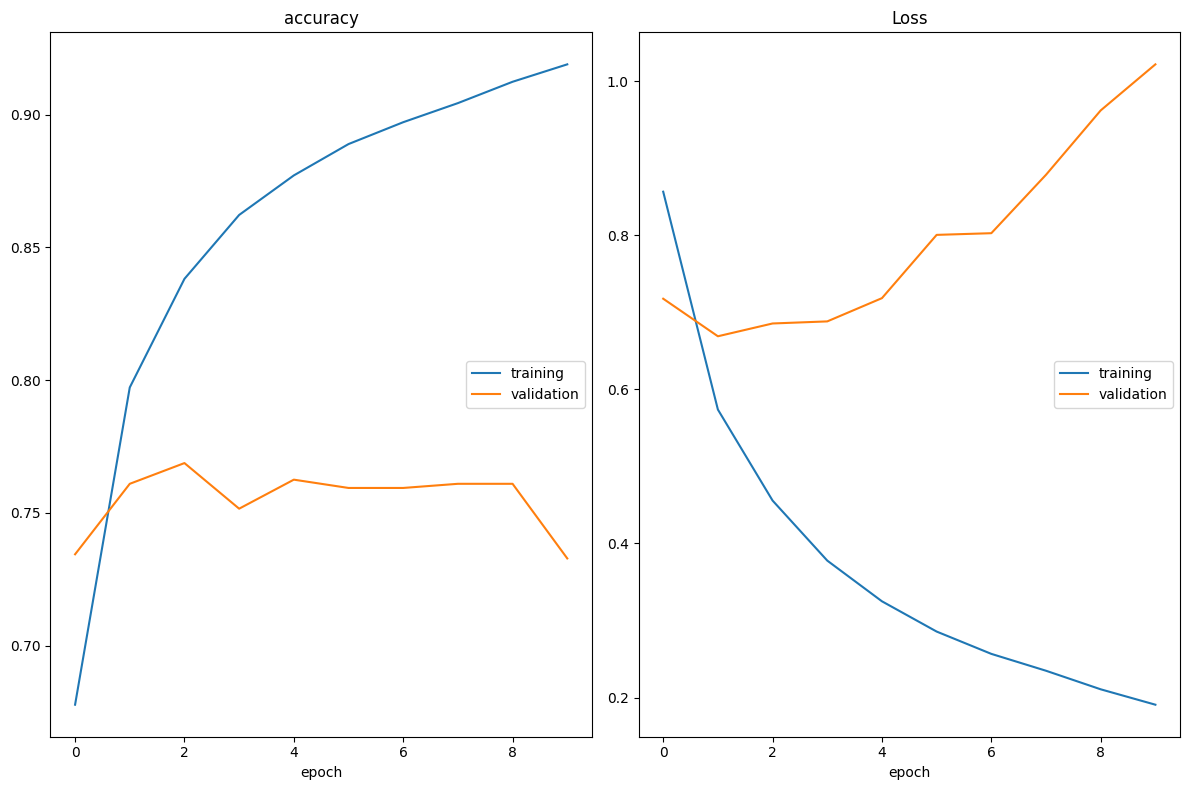

accuracy
	training         	 (min:    0.678, max:    0.919, cur:    0.919)
	validation       	 (min:    0.733, max:    0.769, cur:    0.733)
Loss
	training         	 (min:    0.191, max:    0.857, cur:    0.191)
	validation       	 (min:    0.669, max:    1.022, cur:    1.022)

Epoch 10: val_loss did not improve from 0.66892
1766/1766 [==============================] - 58s 33ms/step - loss: 0.1907 - accuracy: 0.9190 - val_loss: 1.0219 - val_accuracy: 0.7328
CPU times: user 11min 13s, sys: 33.8 s, total: 11min 47s
Wall time: 10min 40s


In [ ]:
%%time
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history_lstm = lstm_bi.fit(X_train_pad, y_train_cat, epochs= 10, batch_size= 64,
                    validation_data=(X_val_pad, y_val_cat),
                    validation_steps=10,
                    class_weight=class_weights,
                    callbacks=callbacks)

🔭 **Model Evaluation**

In [ ]:
# Evaluate the Model
test_loss, test_accuracy = lstm_bi .evaluate(X_test_pad, y_test_cat)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predict on the test set
y_test_pred = lstm_bi.predict(X_test_pad)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)


693/693 [==============================] - 12s 17ms/step - loss: 1.1436 - accuracy: 0.7207
Test Loss: 1.143550992012024
Test Accuracy: 0.7206552624702454
693/693 [==============================] - 11s 16ms/step


In [ ]:
print(classification_report(y_test_encoded, y_test_pred_classes, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          EG       0.87      0.74      0.80      8592
          LB       0.73      0.79      0.76      4198
          LY       0.74      0.69      0.71      5507
          MA       0.51      0.71      0.59      1746
          SD       0.47      0.60      0.52      2116

    accuracy                           0.72     22159
   macro avg       0.66      0.71      0.68     22159
weighted avg       0.74      0.72      0.73     22159



In [ ]:
lstm_bi.save('LSTM_arabic_dialect_model.h5')

**<p align = 'center'> Thank You 😃**